In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import seaborn as sns

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/home/otavio/ml/datasets/World_Data/age/median-age.csv')

In [3]:
print(data.head())
print(data.info())
print(data.describe())

        Entity Code  Year     median
0  Afghanistan  AFG  1950  19.400000
1  Afghanistan  AFG  1955  19.200001
2  Afghanistan  AFG  1960  18.799999
3  Afghanistan  AFG  1965  18.400000
4  Afghanistan  AFG  1970  17.900000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7471 entries, 0 to 7470
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Entity  7471 non-null   object 
 1   Code    6324 non-null   object 
 2   Year    7471 non-null   int64  
 3   median  7471 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 233.6+ KB
None
              Year       median
count  7471.000000  7471.000000
mean   2025.000000    31.930277
std      44.724353    11.134437
min    1950.000000    14.300000
25%    1985.000000    21.000000
50%    2025.000000    31.200001
75%    2065.000000    42.000000
max    2100.000000    56.799999


In [4]:
data2020 = data[data['Year'] == 2020]
data2020

,Entity,Code,Year,median
14,Afghanistan,AFG,2020,18.600000
45,Africa,NaN,2020,19.799999
76,Albania,ALB,2020,38.000000
107,Algeria,DZA,2020,29.100000
138,Angola,AGO,2020,16.799999
...,...,...,...,...
7330,Western Sahara,ESH,2020,28.400000
7361,World,OWID_WRL,2020,30.900000
7392,Yemen,YEM,2020,20.299999
7423,Zambia,ZMB,2020,17.700001


In [5]:
growth = pd.read_csv('/home/otavio/ml/datasets/World_Data/age/population-growth.csv')
growth = growth[growth['Year'] == 2015]
growth

,Entity,Code,Year,Growth,Median age (years)
65,Afghanistan,AFG,2015,2.7056,17.299999
148,Africa,NaN,2015,2.5955,19.400000
231,Albania,ALB,2015,0.4662,36.200001
314,Algeria,DZA,2015,1.9127,27.500000
397,Angola,AGO,2015,3.3639,16.400000
...,...,...,...,...,...
19765,Western Sahara,ESH,2015,1.6450,26.799999
19848,World,OWID_WRL,2015,1.1409,29.600000
19931,Yemen,YEM,2015,2.5681,19.200001
20014,Zambia,ZMB,2015,3.0443,17.100000


In [6]:
data = data2020.merge(growth, on='Entity', how='inner')
data

,Entity,Code_x,Year_x,median,Code_y,Year_y,Growth,Median age (years)
0,Afghanistan,AFG,2020,18.600000,AFG,2015,2.7056,17.299999
1,Africa,NaN,2020,19.799999,NaN,2015,2.5955,19.400000
2,Albania,ALB,2020,38.000000,ALB,2015,0.4662,36.200001
3,Algeria,DZA,2020,29.100000,DZA,2015,1.9127,27.500000
4,Angola,AGO,2020,16.799999,AGO,2015,3.3639,16.400000
...,...,...,...,...,...,...,...,...
236,Western Sahara,ESH,2020,28.400000,ESH,2015,1.6450,26.799999
237,World,OWID_WRL,2020,30.900000,OWID_WRL,2015,1.1409,29.600000
238,Yemen,YEM,2020,20.299999,YEM,2015,2.5681,19.200001
239,Zambia,ZMB,2020,17.700001,ZMB,2015,3.0443,17.100000


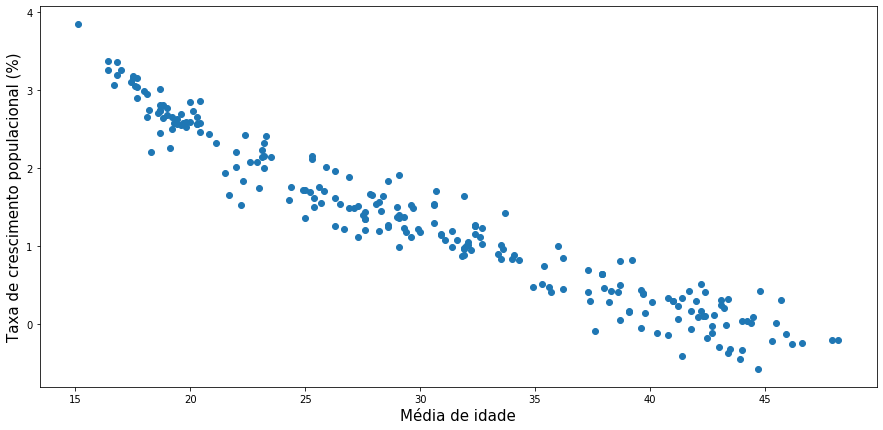

In [15]:
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(data['median'], data['Growth'])
plt.xlabel('Média de idade', fontsize=15)
plt.ylabel('Taxa de crescimento populacional (%)', fontsize=15)
fig.savefig('out.png')

In [22]:
data = data.sort_values('median')
print(data.head(11))

                           Entity Code_x  Year_x     median Code_y  Year_y  \
153                         Niger    NER    2020  15.100000    NER    2015   
128                          Mali    MLI    2020  16.400000    MLI    2015   
221                        Uganda    UGA    2020  16.400000    UGA    2015   
39                           Chad    TCD    2020  16.700001    TCD    2015   
4                          Angola    AGO    2020  16.799999    AGO    2015   
191                       Somalia    SOM    2020  16.799999    SOM    2015   
53   Democratic Republic of Congo    COD    2020  17.000000    COD    2015   
138                 Middle Africa    NaN    2020  17.400000    NaN    2015   
74                         Gambia    GMB    2020  17.500000    GMB    2015   
30                        Burundi    BDI    2020  17.500000    BDI    2015   
29                   Burkina Faso    BFA    2020  17.600000    BFA    2015   

     Growth  Median age (years)  
153  3.8496           14.9000

In [21]:
print(data.tail(11))

              Entity Code_x  Year_x     median Code_y  Year_y  Growth  \
189         Slovenia    SVN    2020  44.500000    SVN    2015  0.0820   
28          Bulgaria    BGR    2020  44.700001    BGR    2015 -0.5783   
89         Hong Kong    HKG    2020  44.799999    HKG    2015  0.4278   
78            Greece    GRC    2020  45.299999    GRC    2015 -0.2175   
201            Spain    ESP    2020  45.500000    ESP    2015  0.0072   
130       Martinique    MTQ    2020  45.700001    MTQ    2015  0.3046   
200  Southern Europe    NaN    2020  45.900002    NaN    2015 -0.1244   
171         Portugal    PRT    2020  46.200001    PRT    2015 -0.2600   
76           Germany    DEU    2020  46.599998    DEU    2015 -0.2440   
98             Italy    ITA    2020  47.900002    ITA    2015 -0.2089   
100            Japan    JPN    2020  48.200001    JPN    2015 -0.2103   

     Median age (years)  
189           43.000000  
28            43.500000  
89            43.200001  
78            43.29

In [23]:
data[data['Entity'] == 'Brazil']

,Entity,Code_x,Year_x,median,Code_y,Year_y,Growth,Median age (years)
26,Brazil,BRA,2020,33.5,BRA,2015,0.8313,31.299999
